### set folder_name and `num_trials`
- `num_trials` and `threshold_shift` based on preprocessing alignment (see PreprocessLeverData notebooks) and can be found for each day's session in the Google sheets analysis log

In [11]:
name = 'ANM7'
session = '20240130_d1'
num_trials = 53
threshold_shift = 0.0

In [12]:
hit_trials_to_exclude = []

### imports:

In [13]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

from common.set_matplotlib_settings import set_matplotlib_settings
from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.select_trials import select_hit_trials
from common.select_trials import save_custom_hit_trials
from common.select_trials import select_custom_hit_trials
from hit_movements.get_movement_thresholds import get_movement_thresholds
from hit_movements.extract_leverpresses import extract_leverpresses
from common.extract_movement_intervals import extract_movement_intervals

### Setup folders and matfiles

In [14]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscriminationData/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, arduino, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

PreprocessLeverData_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
output_folder = "../Data_Copy/AnalysisData/"+name+"/HitMovements_"+name+"_"+session+"/"
!mkdir {output_folder}

respMTX shape: (54, 7)
MTXTrialType shape: (1000, 5)
number of trials: 54


### find all movements from trials that meet all thresholds

select all hit trials for consideration

In [15]:
hit_trials = select_hit_trials(respMTX, num_trials)
save_custom_hit_trials(output_folder, hit_trials)

37  hit trials in this session.


delete trials as necessary and resave

In [16]:
for trial_index in hit_trials_to_exclude:
    hit_trials.remove(trial_index)
save_custom_hit_trials(output_folder, hit_trials)
hit_trials = select_custom_hit_trials(output_folder)

37  hit trials in this session.


_in LeverData voltage_

In [17]:
movement_baseline, movement_threshold, no_movement_threshold = get_movement_thresholds(params, respMTX, threshold_shift)

movement_baseline for all trials should be the same:  2.0454545454545454
mvt threshold:  0.15 + movement_baseline =  2.1954545454545453
nomvt threshold:  0.1 + movement_baseline =  2.1454545454545455


`leverpress_informations`: each selected trial has a row

columns are `trial_index` |  `leverpress_left_index` sample when leverpress starts | `leverpress_right_index` sample when leverpress ends

In [18]:
hit_leverpress_informations = extract_leverpresses(hit_trials, PreprocessLeverData_folder, \
                                              movement_baseline, movement_threshold, no_movement_threshold,\
                                                output_folder)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Checking trial  0 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.690111927668084
20859
new leverpress index value:  2.1973485545411284
finding right threshold...
met
finding left threshold...
met
Checking trial  1 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.9005182524703463
37639
new leverpress index value:  2.195938185946645
finding right threshold...
met
finding left threshold...
met
Checking trial  2 ...
leverpress detection was at below first threshold, try moving leverpress index up...
2.1425635401740597
109900
new leverpress index value:  2.1956591130020784
finding right threshold...
met
finding left threshold...
met
Checking trial  3 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.782036

met
finding left threshold...
met
Checking trial  7 ...
leverpress detection was at below first threshold, try moving leverpress index up...
2.0980365994952153
8591
end of trial, did not have leverpress.
new leverpress index value:  2.1953104735448363
finding right threshold...
met
finding left threshold...
met
Checking trial  8 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  9 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.781560974128781
12358
new leverpress index value:  2.1956021568955526
finding right threshold...
met
finding left threshold...
met
Checking trial  10 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.898185382625599
13184
new leverpress index value:  2.1962051488892995
finding right threshold...
met
finding left threshold...
met
Checking trial  11 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.8983070661744

### Save movements from `movements` into separate "movement_trial#" .npy files
`movement`: first row is times, second row is leverdata

Movements will have MVT0 subtracted off and be temporally aligned to be comparable

In [19]:
hit_movements = extract_movement_intervals(hit_leverpress_informations, \
                                           'processed', PreprocessLeverData_folder, PreprocessLeverData_folder, output_folder, \
                                            movement_baseline)

check by plotting movements that are MVT0 subtracted and temporally aligned:

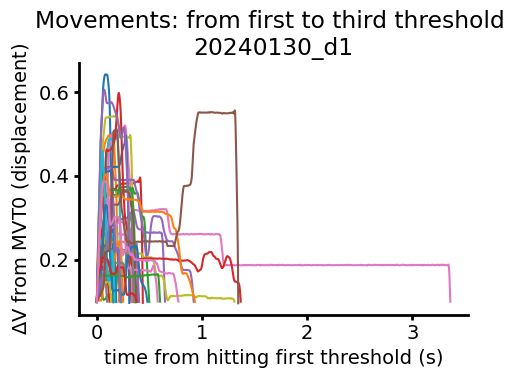

In [20]:
set_matplotlib_settings()

for hit_movement in hit_movements:
    # also check by plotting all of the movements
    plt.plot(hit_movement[0, :], hit_movement[1, :])
plt.title("Movements: from first to third threshold \n"+session)
plt.xlabel("time from hitting first threshold (s)")
plt.ylabel("$\Delta$V from MVT0 (displacement)")

plt.savefig(output_folder+"plot_movements.png")
plt.show()